In [3]:
#import packages
from tensorflow import keras as keras
import tensorflow as tf
import csv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
#image size displayed
IMAGE_WIDTH = 96
IMAGE_HEIGHT = 96

In [14]:
#training
def load_dataset():
    '''
    Load training dataset
    '''
    Xtrain = []
    Ytrain = []
    with open('./training.csv') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            img = np.zeros((IMAGE_HEIGHT,IMAGE_WIDTH,1), dtype=np.float)
            for i, val in enumerate(row["Image"].split(" ")):
                img[i//IMAGE_WIDTH,i%IMAGE_WIDTH,0] = val
            Yitem = []
            failed = False
            for coord in row:
                if coord == "Image":
                    continue
                if(row[coord].strip()==""):
                    failed = True
                    break
                Yitem.append(float(row[coord]))
            if not failed:
                Xtrain.append(img)
                Ytrain.append(Yitem)
                
    return np.array(Xtrain), np.array(Ytrain, dtype=np.float)

In [15]:
# Load dataset
Xdata, Ydata = load_dataset()
Xtrain = Xdata[:]
Ytrain = Ydata[:]

In [16]:
def show_image(X, Y):
    img = np.copy(X)
    for i in range(0,Y.shape[0],2):
        if 0 < Y[i+1] < IMAGE_HEIGHT and 0 < Y[i] < IMAGE_WIDTH:
            img[int(Y[i+1]),int(Y[i]),0] = 255
    plt.imshow(img[:,:,0])

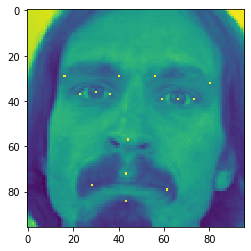

In [17]:
# Preview dataset samples
show_image(Xtrain[0], Ytrain[0])

In [18]:
# Configure Model
model = keras.Sequential([keras.layers.Flatten(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH,1)),
                         keras.layers.Dense(128, activation="relu"),
                         keras.layers.Dropout(0.1),
                         keras.layers.Dense(64, activation="relu"),
                         keras.layers.Dense(30)
                         ])

In [23]:
# Compile model
model.compile(optimizer= 'rmsprop', 
              loss='mse',
              metrics=['mae'])

In [36]:
# Train model
model.fit(Xtrain, Ytrain, epochs=500)

Train on 2140 samples
Epoch 1/500
2140/2140 [==============================] - 1s 683us/sample - loss: 1373.2575 - mae: 32.2211
Epoch 2/500
2140/2140 [==============================] - 1s 673us/sample - loss: 1220.1303 - mae: 29.8355
Epoch 3/500
2140/2140 [==============================] - 2s 734us/sample - loss: 1069.4826 - mae: 27.3182
Epoch 4/500
2140/2140 [==============================] - 2s 753us/sample - loss: 923.6584 - mae: 24.6873
Epoch 5/500
2140/2140 [==============================] - 1s 652us/sample - loss: 785.2006 - mae: 21.9783
Epoch 6/500
2140/2140 [==============================] - 1s 643us/sample - loss: 656.9190 - mae: 19.2850
Epoch 7/500
2140/2140 [==============================] - 1s 634us/sample - loss: 540.4733 - mae: 16.7504
Epoch 8/500
2140/2140 [==============================] - 2s 738us/sample - loss: 436.5695 - mae: 14.3917
Epoch 9/500
2140/2140 [==============================] - 1s 651us/sample - loss: 345.2487 - mae: 12.4357
Epoch 10/500
2140/2140 [======

2140/2140 [==============================] - 1s 642us/sample - loss: 10.1569 - mae: 2.3210
Epoch 156/500
2140/2140 [==============================] - 1s 616us/sample - loss: 10.1589 - mae: 2.3205
Epoch 157/500
2140/2140 [==============================] - 1s 611us/sample - loss: 10.1592 - mae: 2.3194
Epoch 158/500
2140/2140 [==============================] - 1s 668us/sample - loss: 10.1603 - mae: 2.3205
Epoch 159/500
2140/2140 [==============================] - 2s 706us/sample - loss: 10.1563 - mae: 2.3192
Epoch 160/500
2140/2140 [==============================] - 1s 681us/sample - loss: 10.1608 - mae: 2.3200
Epoch 161/500
2140/2140 [==============================] - 1s 664us/sample - loss: 10.1539 - mae: 2.3198
Epoch 162/500
2140/2140 [==============================] - 1s 667us/sample - loss: 10.1600 - mae: 2.3202
Epoch 163/500
2140/2140 [==============================] - 1s 665us/sample - loss: 10.1580 - mae: 2.3202
Epoch 164/500
2140/2140 [==============================] - 1s 620us/s

2140/2140 [==============================] - 1s 620us/sample - loss: 10.1587 - mae: 2.3194 - loss: 10.2338 -
Epoch 310/500
2140/2140 [==============================] - 1s 624us/sample - loss: 10.1578 - mae: 2.3199 - loss: 9.9853 - mae - ETA: 0s - loss: 9.9457 - 
Epoch 311/500
2140/2140 [==============================] - 2s 707us/sample - loss: 10.1639 - mae: 2.3207
Epoch 312/500
2140/2140 [==============================] - 1s 668us/sample - loss: 10.1571 - mae: 2.3194
Epoch 313/500
2140/2140 [==============================] - 1s 656us/sample - loss: 10.1602 - mae: 2.3200
Epoch 314/500
2140/2140 [==============================] - 1s 640us/sample - loss: 10.1555 - mae: 2.3196
Epoch 315/500
2140/2140 [==============================] - 2s 703us/sample - loss: 10.1604 - mae: 2.3200
Epoch 316/500
2140/2140 [==============================] - 1s 616us/sample - loss: 10.1621 - mae: 2.3204
Epoch 317/500
2140/2140 [==============================] - 1s 620us/sample - loss: 10.1585 - mae: 2.3199
Ep

Epoch 386/500
2140/2140 [==============================] - 1s 618us/sample - loss: 10.1576 - mae: 2.3198
Epoch 387/500
2140/2140 [==============================] - 1s 668us/sample - loss: 10.1614 - mae: 2.3198
Epoch 388/500
2140/2140 [==============================] - 1s 669us/sample - loss: 10.1641 - mae: 2.3207
Epoch 389/500
2140/2140 [==============================] - 1s 689us/sample - loss: 10.1595 - mae: 2.3198
Epoch 390/500
2140/2140 [==============================] - 1s 690us/sample - loss: 10.1559 - mae: 2.3192
Epoch 391/500
2140/2140 [==============================] - 2s 738us/sample - loss: 10.1616 - mae: 2.3202
Epoch 392/500
2140/2140 [==============================] - 1s 652us/sample - loss: 10.1601 - mae: 2.3209
Epoch 393/500
2140/2140 [==============================] - 1s 618us/sample - loss: 10.1590 - mae: 2.3204
Epoch 394/500
2140/2140 [==============================] - 1s 634us/sample - loss: 10.1627 - mae: 2.3207
Epoch 395/500
2140/2140 [==============================

In [37]:
# Load test data
def load_testset():
    Xtest = []
    with open('./test.csv') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            img = np.zeros((IMAGE_HEIGHT,IMAGE_WIDTH,1), dtype=np.float)
            for i, val in enumerate(row["Image"].split(" ")):
                img[i//IMAGE_WIDTH,i%IMAGE_WIDTH,0] = val
            Xtest.append(img)
                
    return np.array(Xtest)
Xtest = load_testset()

In [38]:
# Preview results on test data
def show_results(image_index):
    Ypred = model.predict(Xtest[image_index:(image_index+1)])
    show_image(Xtest[image_index], Ypred[0])

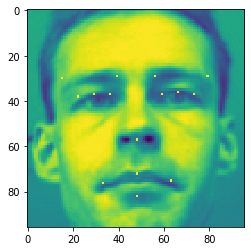

In [39]:
show_results(3)

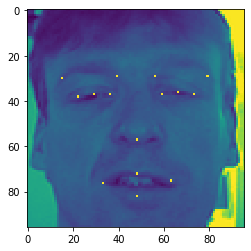

In [42]:
show_results(4)

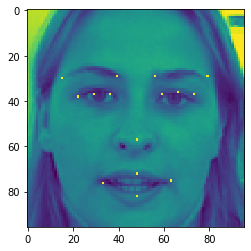

In [41]:
show_results(8)